In [1]:
#Задание 1
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
X, y=load_boston(return_X_y=True)
clmns=load_boston()['feature_names']
print(clmns)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
print(X.shape,y.shape)

(506, 13) (506,)


In [4]:
#делим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

#стандартизация обучающей выборки
zedscore=StandardScaler().fit(X_train)
X_train_z=zedscore.transform(X_train)

#создание и обучение модели TSNE
model=TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_react=model.fit_transform(X_train_z)

In [6]:
print(X_train_react[:10,:],' ',X_train_react.shape)

[[ 28.13809    18.375324 ]
 [ -9.785578   -4.5355387]
 [-15.695753  -17.543627 ]
 [ 37.924854   13.517046 ]
 [ -8.786393    3.9951665]
 [-13.988173   -7.7626657]
 [-11.960751   -7.4771976]
 [-18.704308  -23.812914 ]
 [ 38.665813   12.55771  ]
 [ 35.53426    11.327715 ]]   (404, 2)


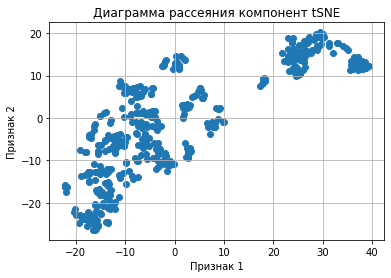

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X_train_react[:,0],X_train_react[:,1])
plt.title('Диаграмма рассеяния компонент tSNE')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid()

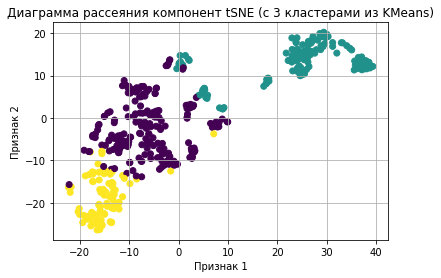

In [8]:
#Задание 2
from sklearn.cluster import KMeans

model2=KMeans(n_clusters=3,max_iter=100,random_state=42)
model2.fit(X_train_z)

plt.scatter(X_train_react[:,0], X_train_react[:,1], c=model2.labels_.astype(float))
plt.title('Диаграмма рассеяния компонент tSNE (с 3 кластерами из KMeans)')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid()

In [9]:
import numpy as np

#Добавляем метки и цены к обучающим данным + переводим в DataFrame
#для дальнейшего анализа
metkas=np.expand_dims(model2.labels_,axis=1)
price=np.expand_dims(y_train,axis=1)
print(metkas.shape,clmns.shape)
X_train_df=np.concatenate((X_train,price,metkas),axis=1)
X_train_df=pd.DataFrame(X_train_df)
#print(clmns.shape,np.array(('price','Label_clust')).shape)

clmns=clmns[:13]
clmns=np.concatenate((clmns,np.array(('price','Label_clust'))))
X_train_df.columns=clmns
print(X_train_df, clmns)

(404, 1) (13,)
         CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
0    15.02340   0.0  18.10   0.0  0.6140  5.304  97.3  2.1007  24.0  666.0   
1     0.62739   0.0   8.14   0.0  0.5380  5.834  56.5  4.4986   4.0  307.0   
2     0.03466  35.0   6.06   0.0  0.4379  6.031  23.3  6.6407   1.0  304.0   
3     7.05042   0.0  18.10   0.0  0.6140  6.103  85.1  2.0218  24.0  666.0   
4     0.72580   0.0   8.14   0.0  0.5380  5.727  69.5  3.7965   4.0  307.0   
..        ...   ...    ...   ...     ...    ...   ...     ...   ...    ...   
399   0.17120   0.0   8.56   0.0  0.5200  5.836  91.9  2.2110   5.0  384.0   
400   0.29916  20.0   6.96   0.0  0.4640  5.856  42.1  4.4290   3.0  223.0   
401   0.01501  80.0   2.01   0.0  0.4350  6.635  29.7  8.3440   4.0  280.0   
402  11.16040   0.0  18.10   0.0  0.7400  6.629  94.6  2.1247  24.0  666.0   
403   0.22876   0.0   8.56   0.0  0.5200  6.405  85.4  2.7147   5.0  384.0   

     PTRATIO       B  LSTAT  price  Label_clust 

In [10]:
#берем часть таблицы
X_train_df_p=X_train_df[['CRIM','price','Label_clust']]

In [11]:
#агрегируем полученные данные
stat_clust=X_train_df_p.groupby('Label_clust').agg('mean')
print(stat_clust)

                  CRIM      price
Label_clust                      
0.0           0.421660  24.958115
1.0          10.797028  16.165354
2.0           0.073566  27.788372


In [12]:
#Задание 3
X_test_z=zedscore.transform(X_test)
Z_params=model.get_params() #здесь нет значений sigma и mean

X_test_react=model.fit_transform(X_test_z) #разве значения sigma и mean не поменяются при прогоне тестовой выборки через старую модель?

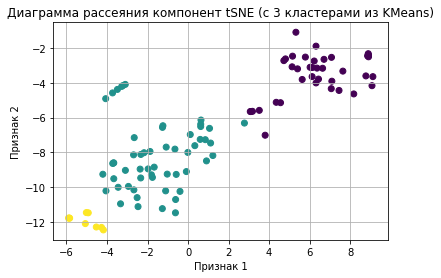

In [13]:
#прогон тестовых данных через готовую модель KMeans
model2.fit(X_test_z)

#построение графика для тестовых данных
plt.scatter(X_test_react[:,0], X_test_react[:,1], c=model2.labels_.astype(float))
plt.title('Диаграмма рассеяния компонент tSNE (с 3 кластерами из KMeans)')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid()

In [14]:
#Добавляем метки и цены к тестовым данным + переводим в DataFrame
#для дальнейшего анализа
metkas=np.expand_dims(model2.labels_,axis=1)
price=np.expand_dims(y_test,axis=1)
X_test_df=np.concatenate((X_test,price,metkas),axis=1)
X_test_df=pd.DataFrame(X_test_df)

X_test_df.columns=clmns
print(X_test_df, clmns)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.09178   0.0   4.05   0.0  0.510  6.416   84.1  2.6463   5.0  296.0   
1     0.05644  40.0   6.41   1.0  0.447  6.758   32.9  4.0776   4.0  254.0   
2     0.10574   0.0  27.74   0.0  0.609  5.983   98.8  1.8681   4.0  711.0   
3     0.09164   0.0  10.81   0.0  0.413  6.065    7.8  5.2873   4.0  305.0   
4     5.09017   0.0  18.10   0.0  0.713  6.297   91.8  2.3682  24.0  666.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
97   18.81100   0.0  18.10   0.0  0.597  4.628  100.0  1.5539  24.0  666.0   
98   14.42080   0.0  18.10   0.0  0.740  6.461   93.3  2.0026  24.0  666.0   
99   14.05070   0.0  18.10   0.0  0.597  6.657  100.0  1.5275  24.0  666.0   
100   0.05188   0.0   4.49   0.0  0.449  6.015   45.1  4.4272   3.0  247.0   
101   0.09512   0.0  12.83   0.0  0.437  6.286   45.0  4.5026   5.0  398.0   

     PTRATIO       B  LSTAT  price  Label_clust  
0       16.6 

In [15]:
#берем часть таблицы
X_test_df_p=X_test_df[['CRIM','price','Label_clust']]

#агрегируем полученные данные
stat_clust_2=X_test_df_p.groupby('Label_clust').agg('mean')
print(stat_clust_2)

                 CRIM      price
Label_clust                     
0.0          9.419182  16.710526
1.0          0.219297  22.690909
2.0          0.040703  34.311111
